## Only to run once during one session

In [2]:
## importing all libraries and dependencies
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import math
from heapq import merge
from random import *
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
opp_SM = []
sam_SM = []
S_sam_SM = []
T_sam_SM = []
S_opp_SM = []
T_opp_SM = []

In [3]:
sum_dir = '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/'
dir_ext = [f for f in listdir(sum_dir)]
pt_dir_lst = []
for i in dir_ext:
    pt_dir = sum_dir + i
    pt_dir_lst.append(pt_dir)

In [4]:
pt_dir_lst

['/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/32.0_ptSM_summary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/32.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/33.0_ptSM_summary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/33.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/33.0_tstMRGDsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/34.0_ptSM_summary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/34.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/35.0_ptSM_summary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/35.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/36.0_ptSM_summary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/36.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/37.0_ptSM_summary.csv',
 '/Users/ayesh/De

In [5]:
tempdist_files = []
srcmem_files = []

for a in pt_dir_lst:
    if a[-4:] == '.csv' and '0_ptsummary' in a:
        tempdist_files.append(a)
    if a[-4:] == '.csv' and '0_ptSM_summary' in a:
        srcmem_files.append(a)

## For each participant

In [6]:
pt_num = '56.0'
for s in srcmem_files:
    pt_num_src = s[-21:-17]
    if pt_num_src == pt_num:
        sr = pd.read_csv(s)
                
src_df = pd.DataFrame(sr)
src_incorr = src_df.loc[src_df['key_resp_corr'] == 0]

In [13]:
src_incorr.key_resp_keys

10     3.0
13     2.0
36     1.0
39     1.0
54     2.0
      ... 
524    3.0
527    2.0
529    1.0
530    3.0
538    1.0
Name: key_resp_keys, Length: 76, dtype: float64

In [14]:
for index, row in src_incorr.iterrows():
    if src_incorr.key_resp_keys[index] == src_incorr.samekey[index] and src_incorr.tested_valence[index] == 'SAFE':
        sam_SM.append(row)
        S_sam_SM.append(row)
    if src_incorr.key_resp_keys[index] == src_incorr.samekey[index] and src_incorr.tested_valence[index] == 'THREAT':
        sam_SM.append(row)
        T_sam_SM.append(row)
    if src_incorr.key_resp_keys[index] == src_incorr.oppkey[index] and src_incorr.tested_valence[index] == 'SAFE':
        opp_SM.append(row)
        S_opp_SM.append(row)
    if src_incorr.key_resp_keys[index] == src_incorr.oppkey[index] and src_incorr.tested_valence[index] == 'SAFE':
        opp_SM.append(row)
        S_opp_SM.append(row)

In [19]:
print(len(sam_SM))
print(len(opp_SM))

42
38


In [22]:
print(len(S_sam_SM))
print(len(T_sam_SM))
print(len(S_opp_SM))
print(len(T_opp_SM))

23
19
38
0


42

In [ ]:
SMdf_extra = pd.DataFrame({'Mean_accuracy':pt_SM,
                     'Mean_safe': safe_pt_SM,
                     'Mean_threat': threat_pt_SM,
                     'Runs_SM':ls_runSM,
                    'Safe_runsSM': safe_ls_runSM,
                    'Threat_runsSM': threat_ls_runSM})
SMdf.to_csv(pt_dt+"SMsummary_newbatch.csv", index = True, header = True)
SMdf

In [9]:
Sr1= (allSM_df['run_num'] == '1') & (allSM_df['tested_valence'] == 'SAFE')
Sr1 = allSM_df[Sr1]
Sr2= (allSM_df['run_num'] == '2') & (allSM_df['tested_valence'] == 'SAFE')
Sr2 = allSM_df[Sr2]
Sr3= (allSM_df['run_num'] == '3') & (allSM_df['tested_valence'] == 'SAFE')
Sr3 = allSM_df[Sr3]
Sr4= (allSM_df['run_num'] == '4') & (allSM_df['tested_valence'] == 'SAFE')
Sr4 = allSM_df[Sr4]
Sr5= (allSM_df['run_num'] == '5') & (allSM_df['tested_valence'] == 'SAFE')
Sr5 = allSM_df[Sr5]

Tr1= (allSM_df['run_num'] == '1') & (allSM_df['tested_valence'] == 'THREAT')
Tr1 = allSM_df[Tr1]
Tr2= (allSM_df['run_num'] == '2') & (allSM_df['tested_valence'] == 'THREAT')
Tr2 = allSM_df[Tr2]
Tr3= (allSM_df['run_num'] == '3') & (allSM_df['tested_valence'] == 'THREAT')
Tr3 = allSM_df[Tr3]
Tr4= (allSM_df['run_num'] == '4') & (allSM_df['tested_valence'] == 'THREAT')
Tr4 = allSM_df[Tr4]
Tr5= (allSM_df['run_num'] == '5') & (allSM_df['tested_valence'] == 'THREAT')
Tr5 = allSM_df[Tr5]

#Sr1src = sum(Sr1.key_resp_corr)/len(Sr1.key_resp_corr)
#Sr2src = sum(Sr2.key_resp_corr)/len(Sr2.key_resp_corr)
#Sr3src = sum(Sr3.key_resp_corr)/len(Sr3.key_resp_corr)
#Sr4src = sum(Sr4.key_resp_corr)/len(Sr4.key_resp_corr)
#Sr5src = sum(Sr5.key_resp_corr)/len(Sr5.key_resp_corr)

#Tr1src = sum(Tr1.key_resp_corr)/len(Tr1.key_resp_corr)
#Tr2src = sum(Tr2.key_resp_corr)/len(Tr2.key_resp_corr)
#Tr3src = sum(Tr3.key_resp_corr)/len(Tr3.key_resp_corr)
#Tr4src = sum(Tr4.key_resp_corr)/len(Tr4.key_resp_corr)
#Tr5src = sum(Tr5.key_resp_corr)/len(Tr5.key_resp_corr)

In [11]:
for a in Sr1:
    if 

,test_object,correct_context,tested_valence,same_val,opp_val,same_foil,opp_foil,test1_thisRepN,test1_thisTrialN,test1_thisN,...,text_4_started,session,participant,date,expName,psychopyVersion,frameRate,Unnamed: 45,run_num,Unnamed: 41
3,new_obs/1_137.jpg,Scenes_selected/scene_068.jpg,THREAT,threat,safe,Scenes_selected/scene_098.jpeg,Scenes_selected/scene_008.jpg,0.0,0.0,0.0,...,NaN,1.0,53.0,2023-05-10_15h43.31.699,src_mem.py,2022.2.4,60.037668,NaN,1,NaN
4,new_obs/1_362.jpg,Scenes_selected/scene_098.jpeg,THREAT,threat,safe,Scenes_selected/scene_058.jpg,Scenes_selected/scene_097.jpeg,0.0,1.0,1.0,...,NaN,1.0,53.0,2023-05-10_15h43.31.699,src_mem.py,2022.2.4,60.037668,NaN,1,NaN
6,new_obs/object_005.jpg,Scenes_selected/scene_038.jpg,THREAT,threat,safe,Scenes_selected/scene_069.jpeg,Scenes_selected/scene_006.jpg,0.0,3.0,3.0,...,NaN,1.0,53.0,2023-05-10_15h43.31.699,src_mem.py,2022.2.4,60.037668,NaN,1,NaN
7,new_obs/1_191.jpg,Scenes_selected/scene_038.jpg,THREAT,threat,safe,Scenes_selected/scene_086.jpg,Scenes_selected/scene_008.jpg,0.0,4.0,4.0,...,NaN,1.0,53.0,2023-05-10_15h43.31.699,src_mem.py,2022.2.4,60.037668,NaN,1,NaN
9,new_obs/1_242.jpg,Scenes_selected/scene_075.jpg,THREAT,threat,safe,Scenes_selected/scene_098.jpeg,Scenes_selected/scene_076.jpg,0.0,6.0,6.0,...,NaN,1.0,53.0,2023-05-10_15h43.31.699,src_mem.py,2022.2.4,60.037668,NaN,1,NaN
10,new_obs/1_39.jpg,Scenes_selected/scene_069.jpeg,THREAT,threat,safe,Scenes_selected/scene_058.jpg,Scenes_selected/scene_073.jpg,0.0,7.0,7.0,...,NaN,1.0,53.0,2023-05-10_15h43.31.699,src_mem.py,2022.2.4,60.037668,NaN,1,NaN
11,new_obs/1_532.jpg,Scenes_selected/scene_098.jpeg,THREAT,threat,safe,Scenes_selected/scene_083.jpg,Scenes_selected/scene_097.jpeg,0.0,8.0,8.0,...,NaN,1.0,53.0,2023-05-10_15h43.31.699,src_mem.py,2022.2.4,60.037668,NaN,1,NaN
12,new_obs/object_307.jpg,Scenes_selected/scene_098.jpeg,THREAT,threat,safe,Scenes_selected/scene_040.jpg,Scenes_selected/scene_008.jpg,0.0,9.0,9.0,...,NaN,1.0,53.0,2023-05-10_15h43.31.699,src_mem.py,2022.2.4,60.037668,NaN,1,NaN
14,new_obs/1_298.jpg,Scenes_selected/scene_038.jpg,THREAT,threat,safe,Scenes_selected/scene_040.jpg,Scenes_selected/scene_073.jpg,0.0,11.0,11.0,...,NaN,1.0,53.0,2023-05-10_15h43.31.699,src_mem.py,2022.2.4,60.037668,NaN,1,NaN
15,new_obs/1_296.jpg,Scenes_selected/scene_098.jpeg,THREAT,threat,safe,Scenes_selected/scene_068.jpg,Scenes_selected/scene_054.jpg,0.0,12.0,12.0,...,NaN,1.0,53.0,2023-05-10_15h43.31.699,src_mem.py,2022.2.4,60.037668,NaN,1,NaN


In [10]:
safe_runs_src = [Sr1src, Sr2src, Sr3src, Sr4src, Sr5src]
threat_runs_src = [Tr1src, Tr2src, Tr3src, Tr4src, Tr5src]

print(safe_runs_src, threat_runs_src)

allSM_df['safe_runsSM'] = str(safe_runs_src)
allSM_df['threat_runsSM'] = str(threat_runs_src)

[0.7407407407407407, 0.6296296296296297, 0.7166666666666667, 0.6111111111111112, 0.7666666666666667] [0.46296296296296297, 0.6481481481481481, 0.6458333333333334, 0.6851851851851852, 0.7083333333333334]


In [11]:
pt_dt = 'C:/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/'
os.makedirs(pt_dt, exist_ok=True)  
allSM_df.to_csv(pt_dt+"%s_ptSM_summary.csv"%pt_num, index = True, header = True )

In [12]:
allSM_df.columns

Index(['test_object', 'correct_context', 'tested_valence', 'same_val',
       'opp_val', 'same_foil', 'opp_foil', 'test1_thisRepN',
       'test1_thisTrialN', 'test1_thisN', 'test1_thisIndex', 'text_9_started',
       'key_resp_6_started', 'key_resp_6_keys', 'key_resp_6_rt',
       'text_11_started', 'key_resp_7_started', 'key_resp_7_keys',
       'key_resp_7_rt', 'text_13_started', 'key_resp_8_started',
       'key_resp_8_keys', 'key_resp_8_rt', 'text_12_started',
       'text_12_stopped', 'text_started', 'object_cue_started',
       'correct_cntxt_started', 'foil_same_started', 'foil_opp_started',
       'key_resp_started', 'corrAns', 'samekey', 'oppkey', 'key_resp_keys',
       'key_resp_corr', 'key_resp_rt', 'text_stopped', 'text_4_started',
       'session', 'participant', 'date', 'expName', 'psychopyVersion',
       'frameRate', 'Unnamed: 45', 'run_num', 'Unnamed: 41', 'run_sm',
       'allrun_src', 'safe_runsSM', 'threat_runsSM'],
      dtype='object')

In [13]:
pt_dt = 'C:/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/'
dt = pd.read_csv(pt_dt+"%s_ptSM_summary.csv"%pt_num)

In [14]:
shrt_df = pd.DataFrame({ 
                        'tested_valence': dt.tested_valence,
                        'same_val': dt.same_val,
                        'opp_val':dt.opp_val,
                        'resp': dt.key_resp_keys,
                        'acc':dt.key_resp_corr,
                        'rt': dt.key_resp_rt, 
                        'runSM': dt.run_sm,
                        'allruns': dt.allrun_src,
                        'corr_key': dt.corrAns,
                        'samekey':dt.samekey,
                        'oppkey':dt.oppkey,
                        'safe_runsSM': dt.safe_runsSM,
                        'threat_runsSM': dt.threat_runsSM})

In [15]:
srcmem_corr = []
srcmem_incor = []
srcmem_miss = []

safe_srcmem_corr = []
safe_srcmem_incor = []
safe_srcmem_miss = []

threat_srcmem_corr = []
threat_srcmem_incor = []
threat_srcmem_miss = []

all_safe = []
all_threat = []


for index, row in shrt_df.iterrows():
    if shrt_df.acc[index] == 1:
        srcmem_corr.append(shrt_df.tested_valence[index])
        
    if shrt_df.tested_valence[index] == 'SAFE':
        all_safe.append(shrt_df.tested_valence[index])
        
    if (shrt_df.acc[index] == 1) and (shrt_df.tested_valence[index] == 'SAFE'):
        safe_srcmem_corr.append(1)
        
    if shrt_df.tested_valence[index] == 'THREAT':
        all_threat.append(shrt_df.tested_valence[index])
        
    if (shrt_df.acc[index] == 1) and (shrt_df.tested_valence[index] == 'THREAT'):
        threat_srcmem_corr.append(1)
        
        
SM = len(srcmem_corr)/len(shrt_df)
pt_SM.append(SM)

ls_runSM.append(shrt_df.allruns[3])
safe_ls_runSM.append(shrt_df.safe_runsSM[3])
threat_ls_runSM.append(shrt_df.threat_runsSM[3]) 

print(len(all_safe))
print(len(all_threat))

print(len(safe_srcmem_corr))
print(len(threat_srcmem_corr))

prop_safe_corr = len(safe_srcmem_corr)/len(all_safe)
prop_threat_corr = len(threat_srcmem_corr)/len(all_threat)

safe_pt_SM.append(prop_safe_corr)
threat_pt_SM.append(prop_threat_corr)

282
258
196
162


## By pt valence

[0.6950354609929078, 0.627906976744186]


Text(0.5, 1.0, '53.0_Source memory by context valence')

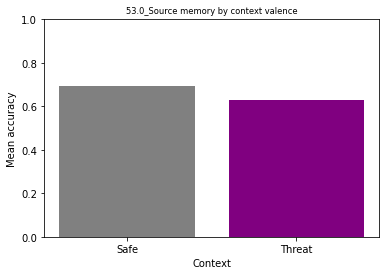

In [16]:
x = ['Safe', 'Threat']
y = [prop_safe_corr, prop_threat_corr]
print(y)
plt.bar(x, y, width=0.8, bottom=None, color = ['grey', 'purple'], align='center', data=None)
plt.ylim(0, 1)
plt.xlabel("Context", fontsize = "medium")
plt.xticks(fontsize = "medium")
plt.ylabel("Mean accuracy", fontsize = "medium")
plt.yticks(fontsize = "medium")
plt.title("%s_Source memory by context valence"%pt_num, fontsize = "small")

In [17]:
SMdf = pd.DataFrame({'Mean_accuracy':pt_SM,
                     'Mean_safe': safe_pt_SM,
                     'Mean_threat': threat_pt_SM,
                     'Runs_SM':ls_runSM,
                    'Safe_runsSM': safe_ls_runSM,
                    'Threat_runsSM': threat_ls_runSM})
SMdf.to_csv(pt_dt+"SMsummary_newbatch.csv", index = True, header = True)
SMdf

,Mean_accuracy,Mean_safe,Mean_threat,Runs_SM,Safe_runsSM,Threat_runsSM
0,0.662963,0.695035,0.627907,"[0.6018518518518519, 0.6388888888888888, 0.685...","[0.7407407407407407, 0.6296296296296297, 0.716...","[0.46296296296296297, 0.6481481481481481, 0.64..."


## Group Graphs

In [4]:
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rc('font', serif='Helvetica Neue') 
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['svg.fonttype']= 'none'
plt.rcParams.update({'font.size': 24})
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)

In [5]:
sum_srcdt = pd.read_csv('C:/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/SMsummary.csv')
sum_srcdt.head()
len(sum_srcdt)

39

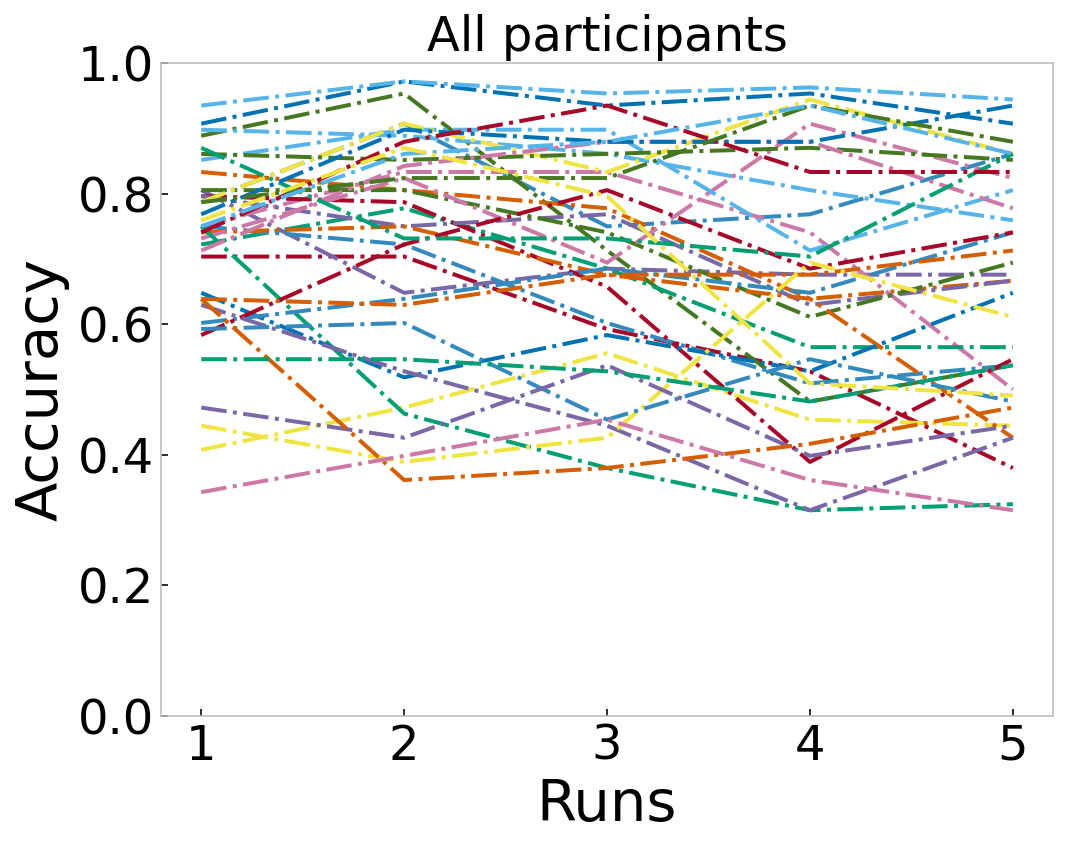

In [6]:
#runs = [1,2,3]
runs = [1,2,3,4,5]
for index, row in sum_srcdt.iterrows():
    b = sum_srcdt.Runs_SM[index]
    g= b.replace('[','')
    h = g.replace(']','')
    res = [float(idx) for idx in h.split(', ')]
    plt.plot(runs, res, linestyle="-.")
    plt.title("All participants", fontsize = 24)
plt.xlabel("Runs")
plt.ylabel("Accuracy")
plt.xticks(runs)
plt.ylim(0,1)
plt.show()

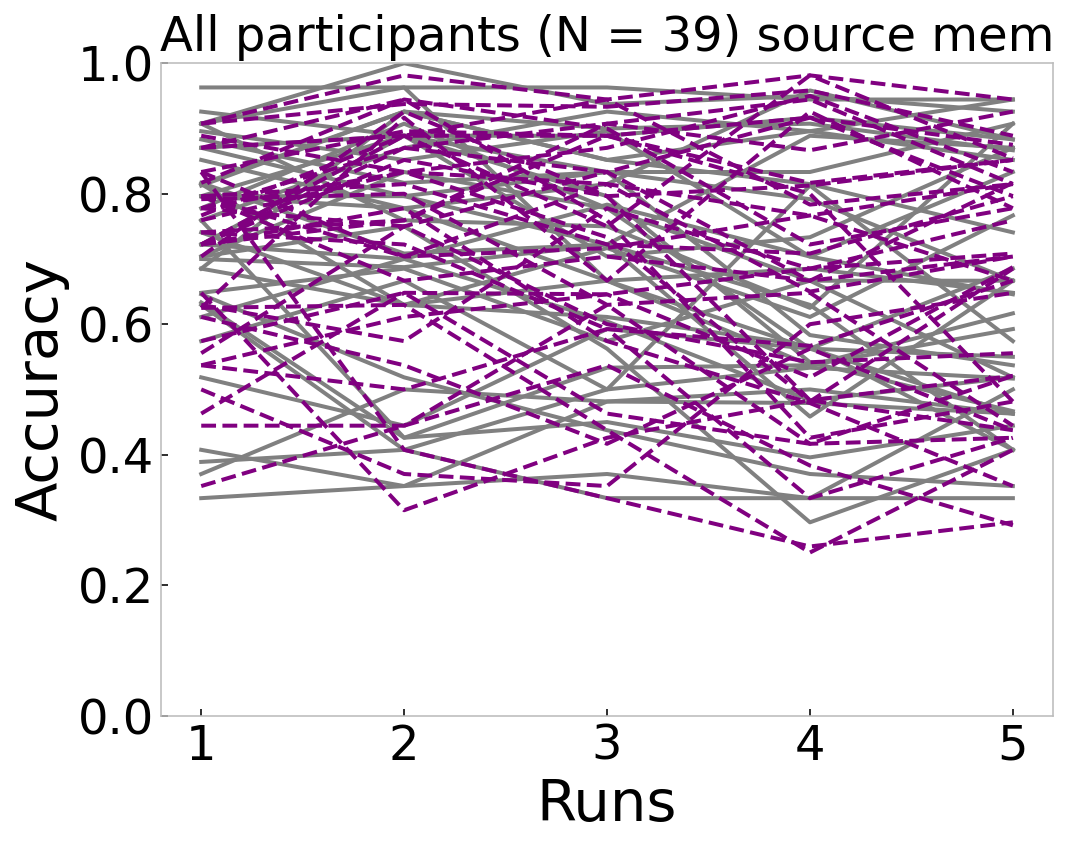

In [7]:
totalpts = len(sum_srcdt)
for index, row in sum_srcdt.iterrows():
    b = sum_srcdt.Safe_runsSM[index]
    g= b.replace('[','')
    h = g.replace(']','')
    res = [float(idx) for idx in h.split(', ')]
    plt.plot(runs, res, linestyle="-", color= "grey", label = "Safe")
    plt.title ("All participants (N = %s) source mem"%totalpts, fontsize = 24)
for index, row in sum_srcdt.iterrows():
    b = sum_srcdt.Threat_runsSM[index]
    g= b.replace('[','')
    h = g.replace(']','')
    res = [float(idx) for idx in h.split(', ')]
    plt.plot(runs, res, linestyle="--", color = "purple", label = "Threat")
    plt.title("All participants (N = %s) source mem"%totalpts, fontsize = 24)

plt.xlabel("Runs")
plt.ylabel("Accuracy")
plt.xticks(runs)
plt.ylim(0,1)
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize = 18)
plt.show()

In [8]:
sum_srcdt

,Unnamed: 0,Subs,Mean_accuracy,Mean_safe,Mean_threat,Runs_SM,Safe_runsSM,Threat_runsSM,Safe_same,Threat_same,Safe_opp,Threat_opp
0,0,32,0.814815,0.811594,0.818182,"[0.7870370370370371, 0.9074074074074074, 0.75,...","[0.8703703703703703, 0.8888888888888888, 0.703...","[0.7037037037037037, 0.9259259259259259, 0.796...",0.519231,0.583333,0.480769,0.416667
1,1,33,0.581481,0.579710,0.583333,"[0.7037037037037037, 0.7037037037037037, 0.592...","[0.6851851851851852, 0.6296296296296297, 0.611...","[0.7222222222222222, 0.7777777777777778, 0.574...",0.508621,0.472727,0.491379,0.527273
2,2,34,0.698148,0.688889,0.707407,"[0.8055555555555556, 0.6481481481481481, 0.685...","[0.8148148148148148, 0.6296296296296297, 0.666...","[0.7962962962962963, 0.6666666666666666, 0.703...",0.535714,0.556962,0.464286,0.443038
3,3,35,0.714815,0.733333,0.696296,"[0.8888888888888888, 0.9537037037037037, 0.712...","[0.9074074074074074, 0.9629629629629629, 0.666...","[0.8703703703703703, 0.9444444444444444, 0.759...",0.486111,0.536585,0.513889,0.463415
4,4,36,0.744485,0.720430,0.769811,"[0.8333333333333334, 0.8055555555555556, 0.777...","[0.8703703703703703, 0.7962962962962963, 0.833...","[0.7962962962962963, 0.8148148148148148, 0.722...",0.525641,0.524590,0.474359,0.475410
5,5,37,0.731481,0.731061,0.731884,"[0.75, 0.8333333333333334, 0.8333333333333334,...","[0.7777777777777778, 0.9074074074074074, 0.777...","[0.7222222222222222, 0.7592592592592593, 0.888...",0.366197,0.513514,0.633803,0.486486
6,6,38,0.842593,0.821970,0.862319,"[0.8981481481481481, 0.8888888888888888, 0.861...","[0.9259259259259259, 0.8888888888888888, 0.833...","[0.8703703703703703, 0.8888888888888888, 0.888...",0.531915,0.657895,0.468085,0.342105
7,7,39,0.662963,0.670455,0.655797,"[0.7222222222222222, 0.7777777777777778, 0.685...","[0.7037037037037037, 0.8333333333333334, 0.777...","[0.7407407407407407, 0.7222222222222222, 0.592...",0.471264,0.484211,0.528736,0.515789
8,8,40,0.466667,0.462121,0.471014,"[0.4074074074074074, 0.4722222222222222, 0.555...","[0.37037037037037035, 0.5, 0.48148148148148145...","[0.4444444444444444, 0.4444444444444444, 0.629...",0.471831,0.479452,0.528169,0.520548
9,10,42,0.935185,0.945652,0.924242,"[0.9074074074074074, 0.9722222222222222, 0.935...","[0.9074074074074074, 1.0, 0.9375, 0.95, 0.9259...","[0.9074074074074074, 0.9375, 0.933333333333333...",0.666667,0.450000,0.333333,0.550000


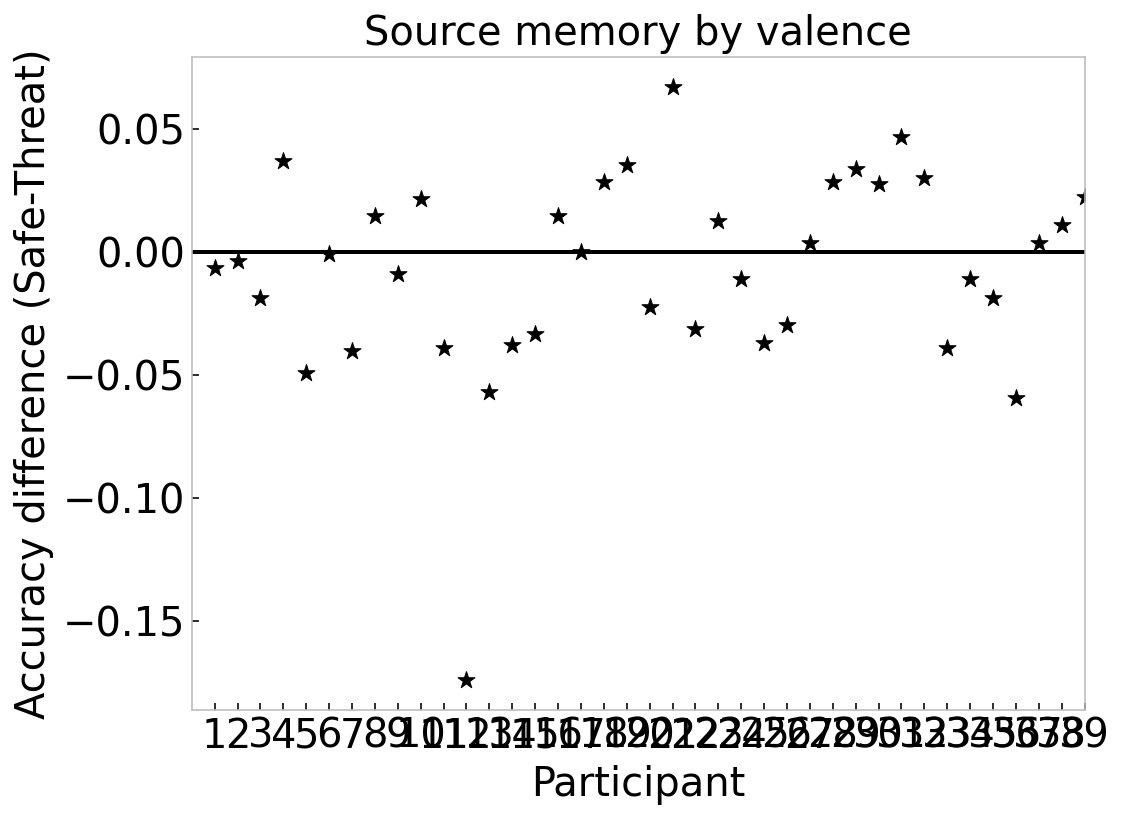

In [9]:

A = sum_srcdt.Mean_safe
B = sum_srcdt.Mean_threat
C = [a - b for a, b in zip(A, B)]
C
x_range = range(1, totalpts + 1)
plt.xlim (0, 23)
plt.xticks(x_range, fontsize = "small")
plt.yticks(fontsize = "small")
plt.scatter(x_range, C, marker='*', color = "black", s = 80)
plt.xlabel("Participant", fontsize = "small")
plt.ylabel("Accuracy difference (Safe-Threat)", fontsize = "small")
plt.title("Source memory by valence", fontsize = "small")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')

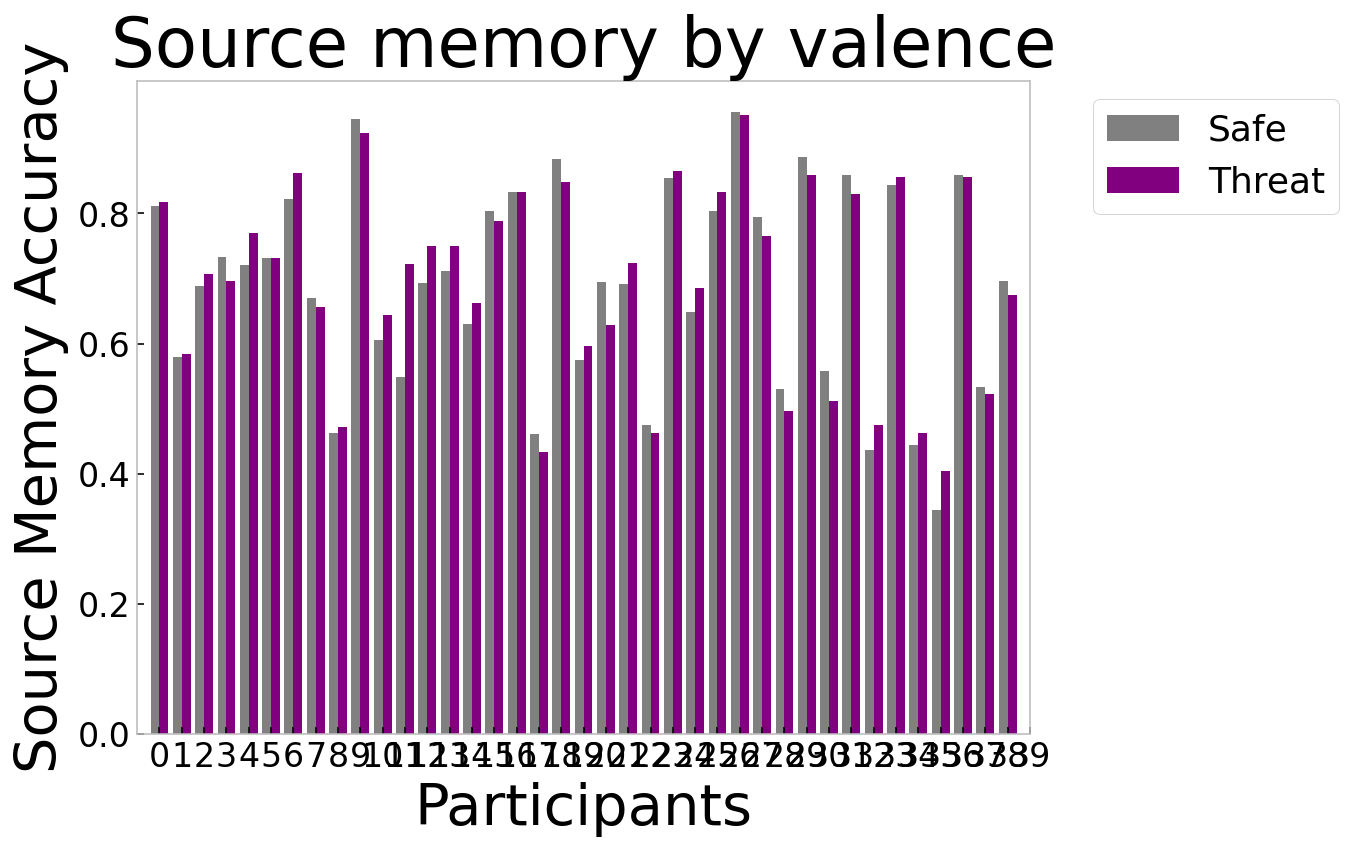

In [37]:
x_axis = np.arange(totalpts)
  
plt.bar(x_axis - 0.2, A, 0.4, label = 'Safe', color = "grey")
plt.bar(x_axis + 0.2, B, 0.4, label = 'Threat', color = "purple")

plt.xlabel("Participants")
plt.ylabel("Source Memory Accuracy")
plt.title("Source memory by valence")
x_range = range(0, totalpts + 1)
y_range = [0.0, 0.2, 0.4, 0.6, 0.8]
plt.xlim (-1, 10)
plt.xticks(x_range, fontsize = "x-small")
plt.yticks(y_range, fontsize = "x-small")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize = 18)
plt.xticks(x_range, fontsize = "x-small")
#plt.show()
plt.savefig('srcmem_val.pdf')

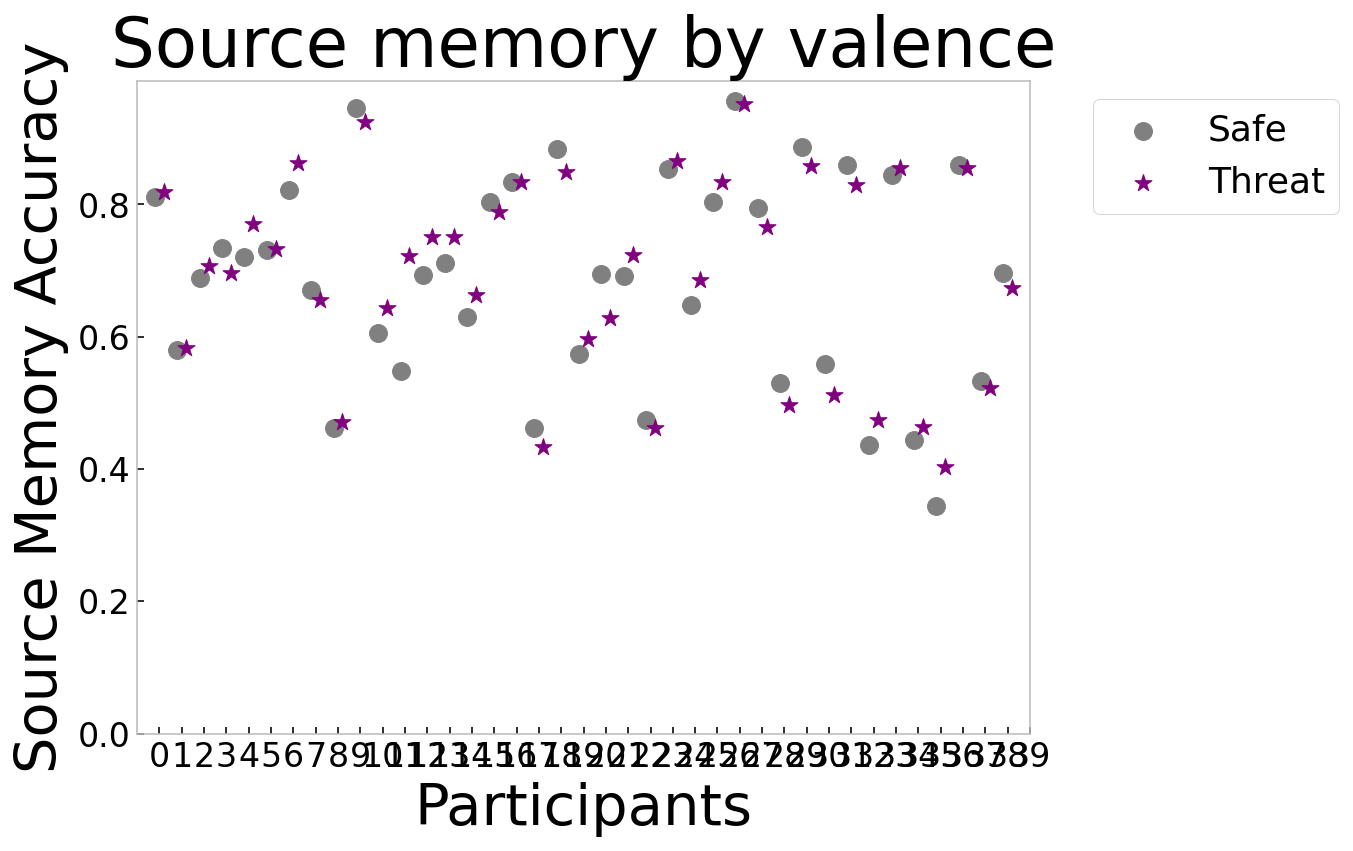

In [34]:
x_axis = np.arange(totalpts)
  
plt.scatter(x_axis - 0.2, A, marker = 'o', label = 'Safe', color = "grey", s = 80)
plt.scatter(x_axis + 0.2, B, marker = '*', label = 'Threat', color = "purple", s = 80)

plt.xlabel("Participants")
plt.ylabel("Source Memory Accuracy")
plt.title("Source memory by valence")
x_range = range(0, totalpts + 1)
y_range = [0.0, 0.2, 0.4, 0.6, 0.8]
plt.xlim (-1, 10)
plt.xticks(x_range, fontsize = "x-small")
plt.yticks(y_range, fontsize = "x-small")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize = 18)
plt.show()

In [21]:
x_range

range(0, 40)

In [24]:
len(B)

39